<a href="https://colab.research.google.com/github/JessePMelo/Challenge-telecom-x/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [2]:
import pandas as pd
import ast
df = pd.read_json(url)

In [3]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df['customer'].apply(type).value_counts()

,count
customer,
<class 'dict'>,7267


In [6]:
df['phone'].apply(type).value_counts()

,count
phone,
<class 'dict'>,7267


In [7]:
df['internet'].apply(type).value_counts()

,count
internet,
<class 'dict'>,7267


In [8]:
df['account'].apply(type).value_counts()

,count
account,
<class 'dict'>,7267


#🔧 Transformação

In [9]:
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],
    pd.json_normalize(df['customer']).add_prefix('customer_'),
    pd.json_normalize(df['phone']).add_prefix('phone_'),
    pd.json_normalize(df['internet']).add_prefix('internet_'),
    pd.json_normalize(df['account']).add_prefix('account_')
], axis=1)

In [10]:
df_normalizado.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Possui_Conjuge',
    'customer_Dependents': 'Possui_Dependentes',
    'customer_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Telefone_Ativo',
    'phone_MultipleLines': 'Multiplas_Linhas',
    'internet_InternetService': 'Tipo_Internet',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_Aparelho',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Filmes',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Fatura_Papel',
    'account_PaymentMethod': 'Metodo_Pagamento',
    'account_Charges.Monthly': 'Cobranca_Mensal',
    'account_Charges.Total': 'Cobranca_Total',
}, inplace=True)

In [12]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          7267 non-null   object 
 1   Cancelou            7267 non-null   object 
 2   Genero              7267 non-null   object 
 3   Idoso               7267 non-null   int64  
 4   Possui_Conjuge      7267 non-null   object 
 5   Possui_Dependentes  7267 non-null   object 
 6   Meses_Contrato      7267 non-null   int64  
 7   Telefone_Ativo      7267 non-null   object 
 8   Multiplas_Linhas    7267 non-null   object 
 9   Tipo_Internet       7267 non-null   object 
 10  Seguranca_Online    7267 non-null   object 
 11  Backup_Online       7267 non-null   object 
 12  Protecao_Aparelho   7267 non-null   object 
 13  Suporte_Tecnico     7267 non-null   object 
 14  Streaming_TV        7267 non-null   object 
 15  Streaming_Filmes    7267 non-null   object 
 16  Tipo_C

In [13]:
df_normalizado.to_csv('dados_normalizados.csv', index=False)

In [14]:
df_normalizado['Cobranca_Total'].apply(type).value_counts()

,count
Cobranca_Total,
<class 'str'>,7267


In [15]:
mapas_traducao = {
    'Yes': 'Sim',
    'No': 'Não',
    'Male': 'Masculino',
    'Female': 'Feminino',
    'No phone service': 'Sem telefone',
    'No internet service': 'Sem internet',
    'Fiber optic': 'Fibra ótica',
    'Month-to-month': 'Mensal',
    'One year': '1 ano',
    'Two year': '2 anos',
    'Mailed check': 'Boleto',
    'Electronic check': 'Débito automático',
    'Credit card (automatic)': 'Cartão de crédito',
    'Bank transfer (automatic)': 'Transferência bancária'
}

colunas_para_traduzir = [
    'Cancelou', 'Genero', 'Possui_Conjuge', 'Possui_Dependentes',
    'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Fatura_Papel', 'Metodo_Pagamento'
]

for col in colunas_para_traduzir:
    df_normalizado[col] = df_normalizado[col].replace(mapas_traducao)

df_normalizado.head(5)

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,1 ano,Sim,Boleto,65.6,593.3
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Boleto,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto,83.9,267.4


In [16]:
df_normalizado['Cancelou'].value_counts(dropna=False)

,count
Cancelou,
Não,5174
Sim,1869
,224


In [17]:
df_normalizado = df_normalizado[df_normalizado['Cancelou'].str.strip() != '']

In [18]:
df_normalizado['Cobranca_Mensal']

,Cobranca_Mensal
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [19]:
import datetime
import calendar

# Pega o ano e mês atual
hoje = datetime.date.today()
ano = hoje.year
mes = hoje.month

# Obtém o número de dias no mês atual
dias_no_mes = calendar.monthrange(ano, mes)[1]
dias_no_mes

30

In [20]:
df_normalizado["Contas_Diarias"]= df_normalizado['Cobranca_Mensal']/dias_no_mes

In [21]:
df_normalizado.head(5)

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,1 ano,Sim,Boleto,65.6,593.3,2.186667
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Boleto,59.9,542.4,1.996667
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,Boleto,83.9,267.4,2.796667


#📊 Carga e análise

In [22]:
import pandas as pd

# Seleciona colunas numéricas
colunas_numericas = df_normalizado.select_dtypes(include=['int64', 'float64']).columns

# Estatísticas descritivas
resumo = df_normalizado[colunas_numericas].describe().T

# Exibe
print(resumo)


                  count       mean        std        min        25%     50%  \
Idoso            7043.0   0.162147   0.368612   0.000000   0.000000   0.000   
Meses_Contrato   7043.0  32.371149  24.559481   0.000000   9.000000  29.000   
Cobranca_Mensal  7043.0  64.761692  30.090047  18.250000  35.500000  70.350   
Contas_Diarias   7043.0   2.158723   1.003002   0.608333   1.183333   2.345   

                    75%         max  
Idoso             0.000    1.000000  
Meses_Contrato   55.000   72.000000  
Cobranca_Mensal  89.850  118.750000  
Contas_Diarias    2.995    3.958333  


In [23]:
df_cancelados = df_normalizado[df_normalizado['Cancelou'] == 'Sim']
df_cancelados

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.90,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.00,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,Boleto,83.90,267.4,2.796667
18,0022-TCJCI,Sim,Masculino,1,Não,Não,45,Sim,Não,DSL,...,Sim,Não,Não,Sim,1 ano,Não,Cartão de crédito,62.70,2791.5,2.090000
19,0023-HGHWL,Sim,Masculino,1,Não,Não,1,Não,Sem telefone,DSL,...,Não,Não,Não,Não,Mensal,Sim,Débito automático,25.10,25.1,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Sim,Masculino,1,Não,Não,21,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,Transferência bancária,96.80,2030.3,3.226667
7246,9965-YOKZB,Sim,Masculino,1,Não,Não,9,Sim,Sim,Fibra ótica,...,Não,Não,Não,Sim,Mensal,Sim,Débito automático,83.85,790.15,2.795000
7260,9985-MWVIX,Sim,Feminino,0,Não,Não,1,Sim,Não,Fibra ótica,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.15,70.15,2.338333
7261,9986-BONCE,Sim,Feminino,0,Não,Não,4,Sim,Não,Não,...,Sem internet,Sem internet,Sem internet,Sem internet,Mensal,Não,Transferência bancária,20.95,85.5,0.698333


In [24]:
df_normalizado

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,1 ano,Sim,Boleto,65.60,593.3,2.186667
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Boleto,59.90,542.4,1.996667
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.90,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.00,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,Boleto,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,0,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,1 ano,Não,Boleto,55.15,742.9,1.838333
7263,9992-RRAMN,Sim,Masculino,0,Sim,Não,22,Sim,Sim,Fibra ótica,...,Não,Não,Não,Sim,Mensal,Sim,Débito automático,85.10,1873.7,2.836667
7264,9992-UJOEL,Não,Masculino,0,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Boleto,50.30,92.75,1.676667
7265,9993-LHIEB,Não,Masculino,0,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,2 anos,Não,Boleto,67.85,4627.65,2.261667


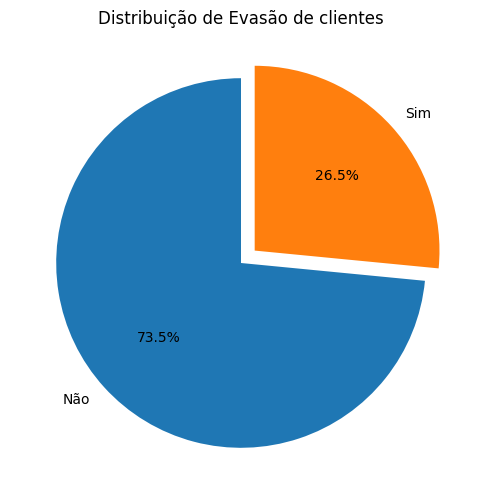

In [26]:
import matplotlib.pyplot as plt

churn_counts = df_normalizado['Cancelou'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribuição de Evasão de clientes')
plt.show()


Evasão por genero

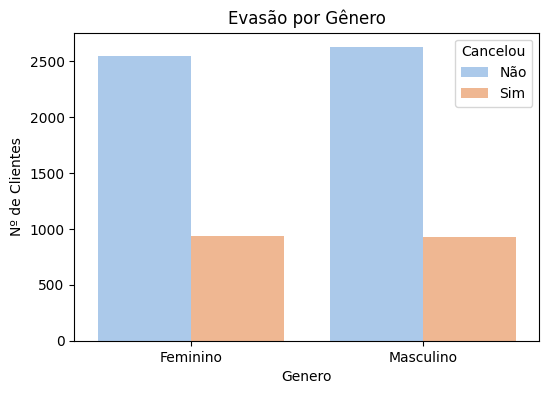

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='Genero', hue='Cancelou', palette='pastel')
plt.title('Evasão por Gênero')
plt.ylabel('Nº de Clientes')
plt.show()

Evasão por tipo de contrato

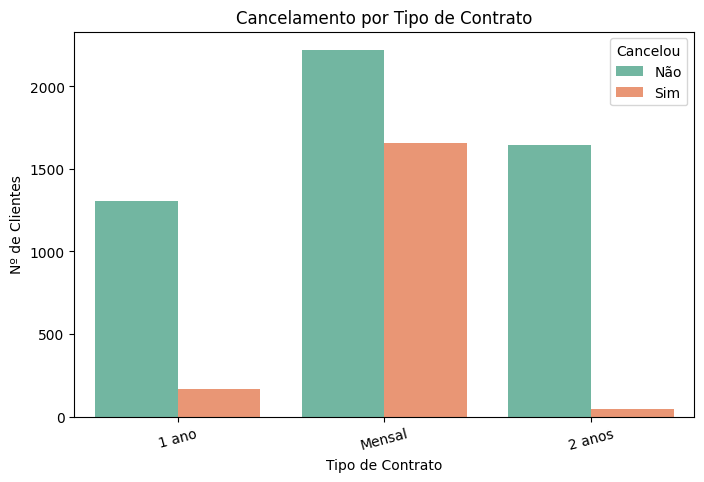

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_normalizado, x='Tipo_Contrato', hue='Cancelou', palette='Set2')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Nº de Clientes')
plt.xticks(rotation=15)
plt.show()

Evasão por metodo de pagamento

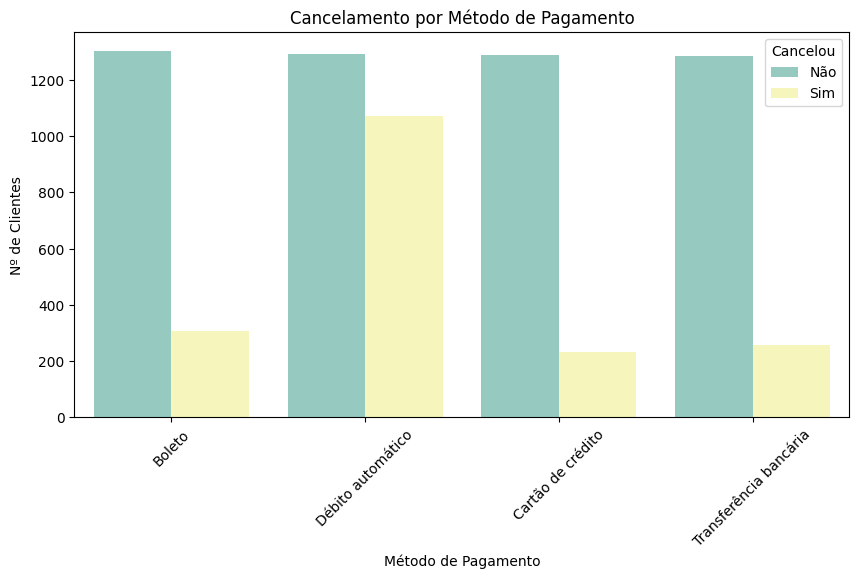

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_normalizado, x='Metodo_Pagamento', hue='Cancelou', palette='Set3')
plt.title('Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Nº de Clientes')
plt.xticks(rotation=45)
plt.show()

Evasão por dependetes

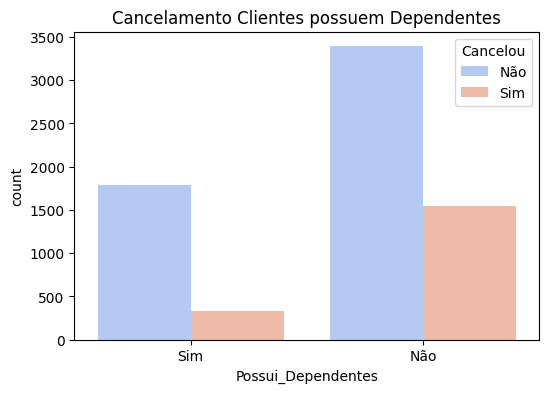

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='Possui_Dependentes', hue='Cancelou', palette='coolwarm')
plt.title('Cancelamento Clientes possuem Dependentes')
plt.show()

Contagem de evasão por variaveis numericas.

In [33]:
df_normalizado['Cobranca_Total'] = pd.to_numeric(df_normalizado['Cobranca_Total'], errors='coerce')

<ipython-input-37-cc65d2f905a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Cancelou', y='Cobranca_Mensal', palette='Set2')


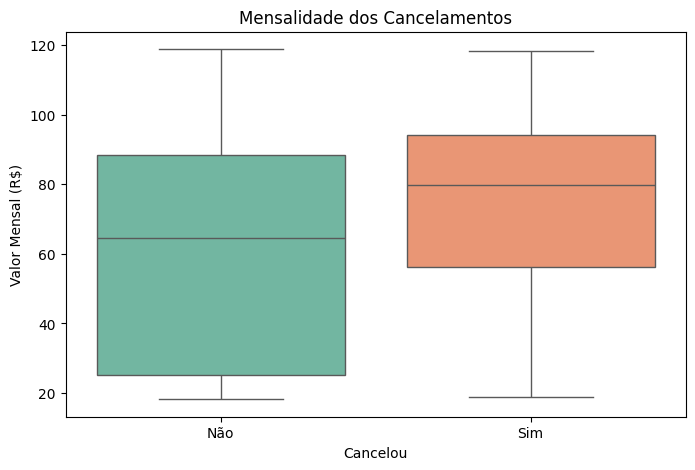

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_normalizado, x='Cancelou', y='Cobranca_Mensal', palette='Set2')
plt.title('Mensalidade dos Cancelamentos')
plt.ylabel('Valor Mensal (R$)')
plt.show()

In [39]:
df_normalizado.groupby('Cancelou')[['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total']].mean()

,Meses_Contrato,Cobranca_Mensal,Cobranca_Total
Cancelou,,,
Não,37.569965,61.265124,2555.344141
Sim,17.979133,74.441332,1531.796094


#📄Relatorio Final